# Predicción de Utilidades de Películas

### a) Lectura y carga de archivos

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.io import mmread
from sklearn.linear_model import ElasticNet
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

#Se leen y cargan datos de entrenamiento
tiempo_lec_ini = time()
X = csr_matrix(mmread('../data/train.x.mm'))
y = np.loadtxt('../data/train.y.dat')

#Se Leen y cargan datos de validacion
X_val = csr_matrix(mmread('../data/dev.x.mm'))
y_val = np.loadtxt('../data/dev.y.dat')

#Se Leen y cargan datos de validacion
X_test = csr_matrix(mmread('../data/test.x.mm'))
y_test = np.loadtxt('../data/test.y.dat')

tiempo_lec_fin = time()
print "Tiempo de lectura es: ", (tiempo_lec_fin - tiempo_lec_ini)

Tiempo de lectura es:  48.7380001545


Es importante mantener el formato disperso (*sparse*) debido a que permite mantener en memoria sólo las entradas no nulas de la matriz. Esto es óptimo cuando las matrices son demasiado grandes en comparación con la cantidad de entradas no nulas, es decir, una matriz dispersa. Para este caso en el archivo de entrenamiento, se tiene 1.147 filas y 145.256 columnas por tanto el tamaño de la matriz es de 166.608.632 celdas, pero sólo se tienen 2.764.110 entradas no lunas. De esta manera, es mucho más conveniente y **eficiente** almacenar la matriz de manera dispersa, esto es, sólo los 2.764.110 datos en vez de la matriz entera.

### b) Construcción del modelo
Se utiliza el modelo ElasticNet propuesto en el paper "*Movie Reviews and Revenues: An Experiment in Text Regression*". El cual es una regresión lineal que combina la norma L1 y L2 para penalizar, como se expresa en la siguiente ecuación:
$$\widehat{\theta} = argmin\frac{1}{2n} \sum_{i=0}^n (y_i - (\beta_0 + x_i^T\beta)^2  + \lambda P(B)$$
$$P(B) = \sum_{j=0}^p (\frac{1}{2}(1-\alpha)\beta_j^2 + \alpha |\beta_j|)$$
El parámetro $\alpha$ es un valor que va de 0 a 1 e indica el *tradeoff* entre las penalizaciones. Si es 0 significa que se penaliza mediante Ridge y si es 1 con Lasso.
Para experimentar se fijo el valor de $\alpha$ y se regularizó $\lambda$ con valores en el intervalo $[10^{-2}, 10]$. Una vez terminado el ciclo de iteraciones se guarda el mejor $\lambda_{best}$ para un $\alpha$ determinado. Luego, se cambia el valor de $\alpha$ y se vuelve a iterar. Los valores considerados para el parámetro $\alpha$ son $[0,0.25,0.5,0.75,1]$ debido al tiempo de ejecución. Una vez encontrado los mejores $\lambda_{best}$ para cada $\alpha$, se genera el modelo con el mejor par $\lambda_{best}$, $\alpha$ y se procede a usar el conjunto de prueba para determinar el coeficiente de determinación.

C:\Users\theda\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


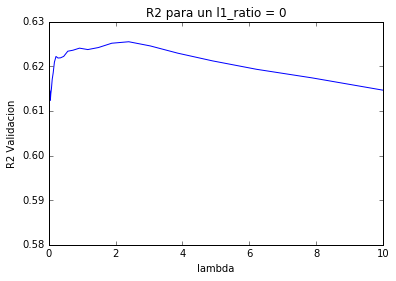

Para un alpha de 2.39502661999 y l1_ratio de 0 el mejor coeficiente para el conjunto de evaluacion es: 0.62548733486 


In [2]:
#Se fija el valor de l1_ratio en 0 y se mueve el valor de alpha
best_score = []
b = 0
#Lista de valores de alpha
alphas_ = np.logspace(-2, 1, num=30, base=10)
coefs = []
model = ElasticNet(fit_intercept = False)
#print '{:^15} {:^10} {:^15}'.format('alpha', 'l1_ratio', 'coef_validation')
for a in alphas_:
    model.set_params(alpha = a, l1_ratio = b)
    model.fit(X, y)
    coef = model.score(X_val, y_val)
    coefs.append(coef)
    #print '{:^15} {:^10} {:^15}'.format(a, b, coef)

best_alpha = alphas_[coefs.index(max(coefs))]
best_score.append((max(coefs),best_alpha, b))

plt.plot(alphas_, coefs)
plt.ylabel('R2 Validacion')
plt.xlabel('lambda')
plt.title('R2 para un l1_ratio = 0')
plt.show()

print 'Para un alpha de {} y l1_ratio de {} el mejor coeficiente para el conjunto de evaluacion es: {} '.format(best_alpha,b,(max(coefs)))

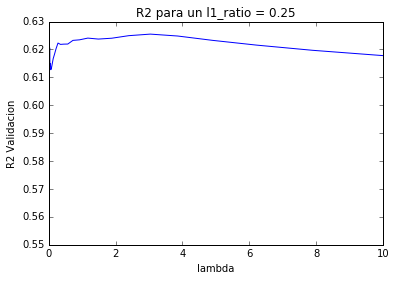

Para un alpha de 3.03919538231 y l1_ratio de 0.25 el mejor coeficiente para el conjunto de evaluacion es: 0.625515714326 


In [3]:
b = 0.25
alphas_ = np.logspace(-2, 1, num=30, base=10)
coefs = []
model = ElasticNet(fit_intercept = False)
#print '{:^15} {:^10} {:^15}'.format('alpha', 'l1_ratio', 'coef_validation')
for a in alphas_:
    model.set_params(alpha = a, l1_ratio = b)
    model.fit(X, y)
    coef = model.score(X_val, y_val)
    coefs.append(coef)
    #print '{:^15} {:^10} {:^15}'.format(a, b, coef)

best_alpha = alphas_[coefs.index(max(coefs))]
best_score.append((max(coefs),best_alpha, b))

plt.plot(alphas_, coefs)
plt.ylabel('R2 Validacion')
plt.xlabel('lambda')
plt.title('R2 para un l1_ratio = 0.25')
plt.show()
print 'Para un alpha de {} y l1_ratio de {} el mejor coeficiente para el conjunto de evaluacion es: {} '.format(best_alpha,b,max(coefs))

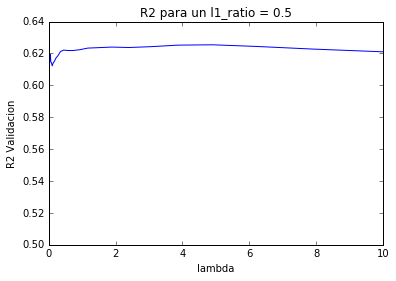

Para un alpha de 4.89390091848 y l1_ratio de 0.5 el mejor coeficiente para el conjunto de evaluacion es: 0.6254563634 


In [5]:
b = 0.5
alphas_ = np.logspace(-2, 1, num=30, base=10)
coefs = []
model = ElasticNet(fit_intercept = False)
#print '{:^15} {:^10} {:^15}'.format('alpha', 'l1_ratio', 'coef_validation')
for a in alphas_:
    model.set_params(alpha = a, l1_ratio = b)
    model.fit(X, y)
    coef = model.score(X_val, y_val)
    coefs.append(coef)
    #print '{:^15} {:^10} {:^15}'.format(a, b, coef)

best_alpha = alphas_[coefs.index(max(coefs))]
best_score.append((max(coefs),best_alpha, b))

plt.plot(alphas_, coefs)
plt.ylabel('R2 Validacion')
plt.xlabel('lambda')
plt.title('R2 para un l1_ratio = 0.5')
plt.show()
print 'Para un alpha de {} y l1_ratio de {} el mejor coeficiente para el conjunto de evaluacion es: {} '.format(best_alpha,b,(max(coefs)))

     alpha       l1_ratio  coef_validation
     0.01          0.75    0.528822165527 
0.0126896100317    0.75    0.526096203466 
0.0161026202756    0.75    0.514361403505 
0.0204335971786    0.75    0.517563875426 
0.025929437974     0.75    0.540441627796 
0.0329034456231    0.75    0.561738352431 
0.0417531893656    0.75    0.588478464494 
0.0529831690628    0.75    0.612793464431 
0.067233575365     0.75     0.61586050469 
0.0853167852417    0.75    0.616817636809 
0.108263673387     0.75    0.618316037683 
0.137382379588     0.75    0.615045458913 
 0.17433288222     0.75    0.613852381078 
0.221221629107     0.75    0.612176285904 
0.280721620394     0.75    0.614280528448 
0.356224789026     0.75    0.615266354197 
0.452035365636     0.75    0.617308376654 
0.573615251045     0.75    0.618782366215 
0.727895384398     0.75     0.62150901752 
0.923670857187     0.75    0.622058010875 
 1.17210229753     0.75    0.621872674891 
 1.48735210729     0.75    0.621829580652 
 1.88739182

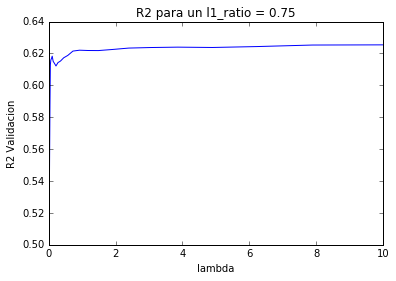

Para un alpha de 10.0 y l1_ratio de 0.75 el mejor coeficiente para el conjunto de evaluacion es: 0.625413209611 


In [6]:
b = 0.75
alphas_ = np.logspace(-2, 1, num=30, base=10)
coefs = []
model = ElasticNet(fit_intercept = False)
#print '{:^15} {:^10} {:^15}'.format('alpha', 'l1_ratio', 'coef_validation')
for a in alphas_:
    model.set_params(alpha = a, l1_ratio = b)
    model.fit(X, y)
    coef = model.score(X_val, y_val)
    coefs.append(coef)
    #print '{:^15} {:^10} {:^15}'.format(a, b, coef)

best_alpha = alphas_[coefs.index(max(coefs))]
best_score.append((max(coefs),best_alpha, b))

plt.plot(alphas_, coefs)
plt.ylabel('R2 Validacion')
plt.xlabel('lambda')
plt.title('R2 para un l1_ratio = 0.75')
plt.show()
print 'Para un alpha de {} y l1_ratio de {} el mejor coeficiente para el conjunto de evaluacion es: {} '.format(best_alpha,b,max(coefs))

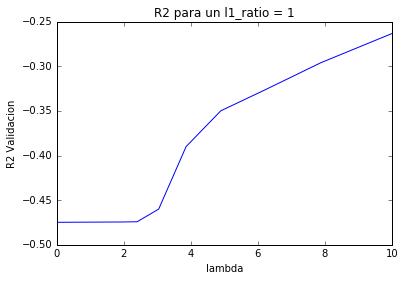

Para un alpha de 10.0 y l1_ratio de 1 el mejor coeficiente para el conjunto de evaluacion es: -0.263461550071 


In [7]:
b = 1
alphas_ = np.logspace(-2, 1, num=30, base=10)
coefs = []
model = ElasticNet(fit_intercept = False)
#print '{:^15} {:^10} {:^15}'.format('alpha', 'l1_ratio', 'coef_validation')
for a in alphas_:
    model.set_params(alpha = a, l1_ratio = b)
    model.fit(X, y)
    coef = model.score(X_val, y_val)
    coefs.append(coef)
    #print '{:^15} {:^10} {:^15}'.format(a, b, coef)

best_alpha = alphas_[coefs.index(max(coefs))]
best_score.append((max(coefs),best_alpha, b))

plt.plot(alphas_, coefs)
plt.ylabel('R2 Validacion')
plt.xlabel('lambda')
plt.title('R2 para un l1_ratio = 1')
plt.show()
print 'Para un alpha de {} y l1_ratio de {} el mejor coeficiente para el conjunto de evaluacion es: {} '.format(best_alpha,b,max(coefs))

In [10]:
#Se calcula coeficiente de determinacion en el conjunto de prueba para el mejor par alpha - l1_ratio
a = max(best_score)[1]
b = max(best_score)[2]
model = ElasticNet(fit_intercept = False)
model.set_params(alpha = a, l1_ratio = b, max_iter = 3000)
model.fit(X, y)
coef = model.score(X_test, y_test)
print 'Para un alpha de {} y l1_ratio de {} el mejor coeficiente para el conjunto de evaluacion es: {} '.format(a,b,coef)

Para un alpha de 3.03919538231 y l1_ratio de 0.25 el mejor coeficiente para el conjunto de evaluacion es: 0.590686153135 


**Finalmente, el mejor coeficiente de determinación encontrado es: 0.590686153135 con un $\lambda$ = 3.039 y $\alpha$ = 0.25.**